In [1]:
!pip install opendatasets

  Obtaining dependency information for opendatasets from https://files.pythonhosted.org/packages/00/e7/12300c2f886b846375c78a4f32c0ae1cd20bdcf305b5ac45b8d7eceda3ec/opendatasets-0.1.22-py3-none-any.whl.metadata
  Obtaining dependency information for tqdm from https://files.pythonhosted.org/packages/2a/14/e75e52d521442e2fcc9f1df3c5e456aead034203d4797867980de558ab34/tqdm-4.66.2-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ------- -------------------------------- 10.2/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB 1.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/84.6 kB ? eta -:--:--
     ---------------------------------------- 84.6/84.6 kB 2.4 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  P


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import opendatasets as od

In [15]:
!pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/7b/0e/25d6b5678ed3c7e12bc94d047d0e9492e89cc78b7ea0034ac0f1cf2ff304/scikit_learn-1.4.1.post1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.6.0 from https://files.pythonhosted.org/packages/9a/25/5b30cb3efc9566f0ebeaeca1976150316353c17031ad7868ef46de5ab8dc/scipy-1.12.0-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ---------------------------------------- 60.4/60.4 kB 3.1 MB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/b1/2c/f504e55d98418f2fcf756a56877e6d9a45dd5ed28b3d7c267b300e85ad5b/threadpoolctl-3.3.0-py3-none-any.whl


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [26]:
data=pd.read_csv("boston.xls")

In [27]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [28]:
data.shape

(506, 14)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [30]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [31]:
data.isnull().sum()*100/data.shape[0]

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
MEDV       0.0
dtype: float64

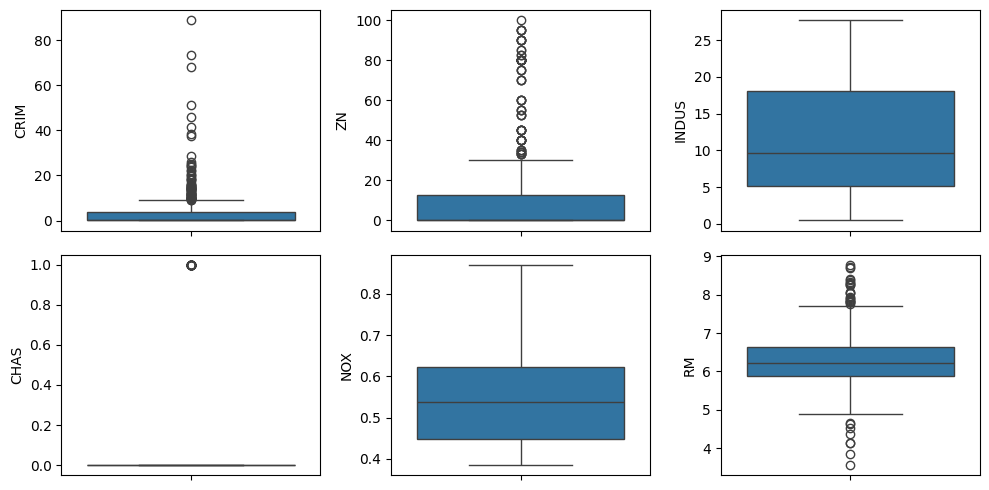

In [32]:
fig,axs=plt.subplots(2,3,figsize=(10,5))
plt1=sns.boxplot(data['CRIM'],ax=axs[0,0])
plt2=sns.boxplot(data['ZN'],ax=axs[0,1])
plt3=sns.boxplot(data['INDUS'],ax=axs[0,2])
plt1=sns.boxplot(data['CHAS'],ax=axs[1,0])
plt2=sns.boxplot(data['NOX'],ax=axs[1,1])
plt1=sns.boxplot(data['RM'],ax=axs[1,2])
plt.tight_layout()

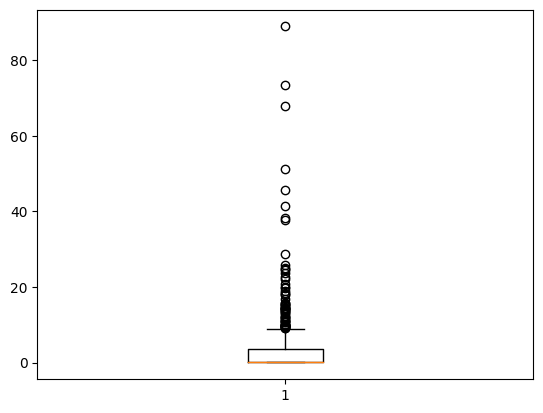

In [33]:
plt.boxplot(data.CRIM)
Q1=data.CRIM.quantile(0.25)
Q3=data.CRIM.quantile(0.75)
IQR=Q3+Q1
data=data[(data.CRIM>=Q1-1.5*IQR)&(data.CRIM<=Q3+1.5*IQR)]

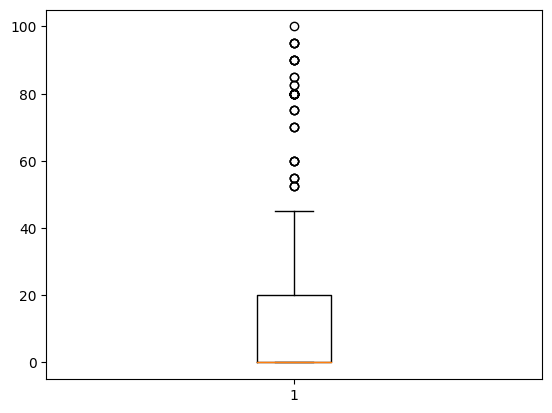

In [34]:
plt.boxplot(data.ZN)
Q1=data.ZN.quantile(0.25)
Q3=data.ZN.quantile(0.75)
IQR=Q3+Q1
data=data[(data.ZN>=Q1-1.5*IQR)&(data.ZN<=Q3+1.5*IQR)]

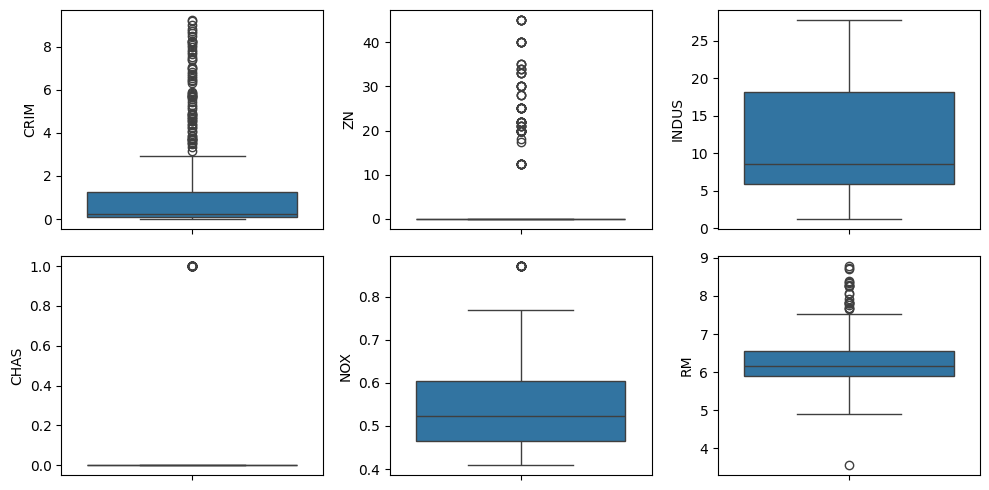

In [35]:
data=data.reset_index()
fig,axs=plt.subplots(2,3,figsize=(10,5))
plt1=sns.boxplot(data['CRIM'],ax=axs[0,0])
plt2=sns.boxplot(data['ZN'],ax=axs[0,1])
plt3=sns.boxplot(data['INDUS'],ax=axs[0,2])
plt1=sns.boxplot(data['CHAS'],ax=axs[1,0])
plt2=sns.boxplot(data['NOX'],ax=axs[1,1])
plt1=sns.boxplot(data['RM'],ax=axs[1,2])
plt.tight_layout()

In [38]:
varlist=['AGE','DIS','RAD','TAX','PTRATIO','B']
def binary_map(x):
    return x.map({'yes':1,"no":0})
data[varlist]=data[varlist].apply(binary_map)

In [40]:
data.head()

,index,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0,0.538,6.575,NaN,NaN,NaN,NaN,NaN,NaN,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,NaN,NaN,NaN,NaN,NaN,NaN,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,NaN,NaN,NaN,NaN,NaN,NaN,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,NaN,NaN,NaN,NaN,NaN,NaN,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,NaN,NaN,NaN,NaN,NaN,NaN,5.33,36.2


C:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


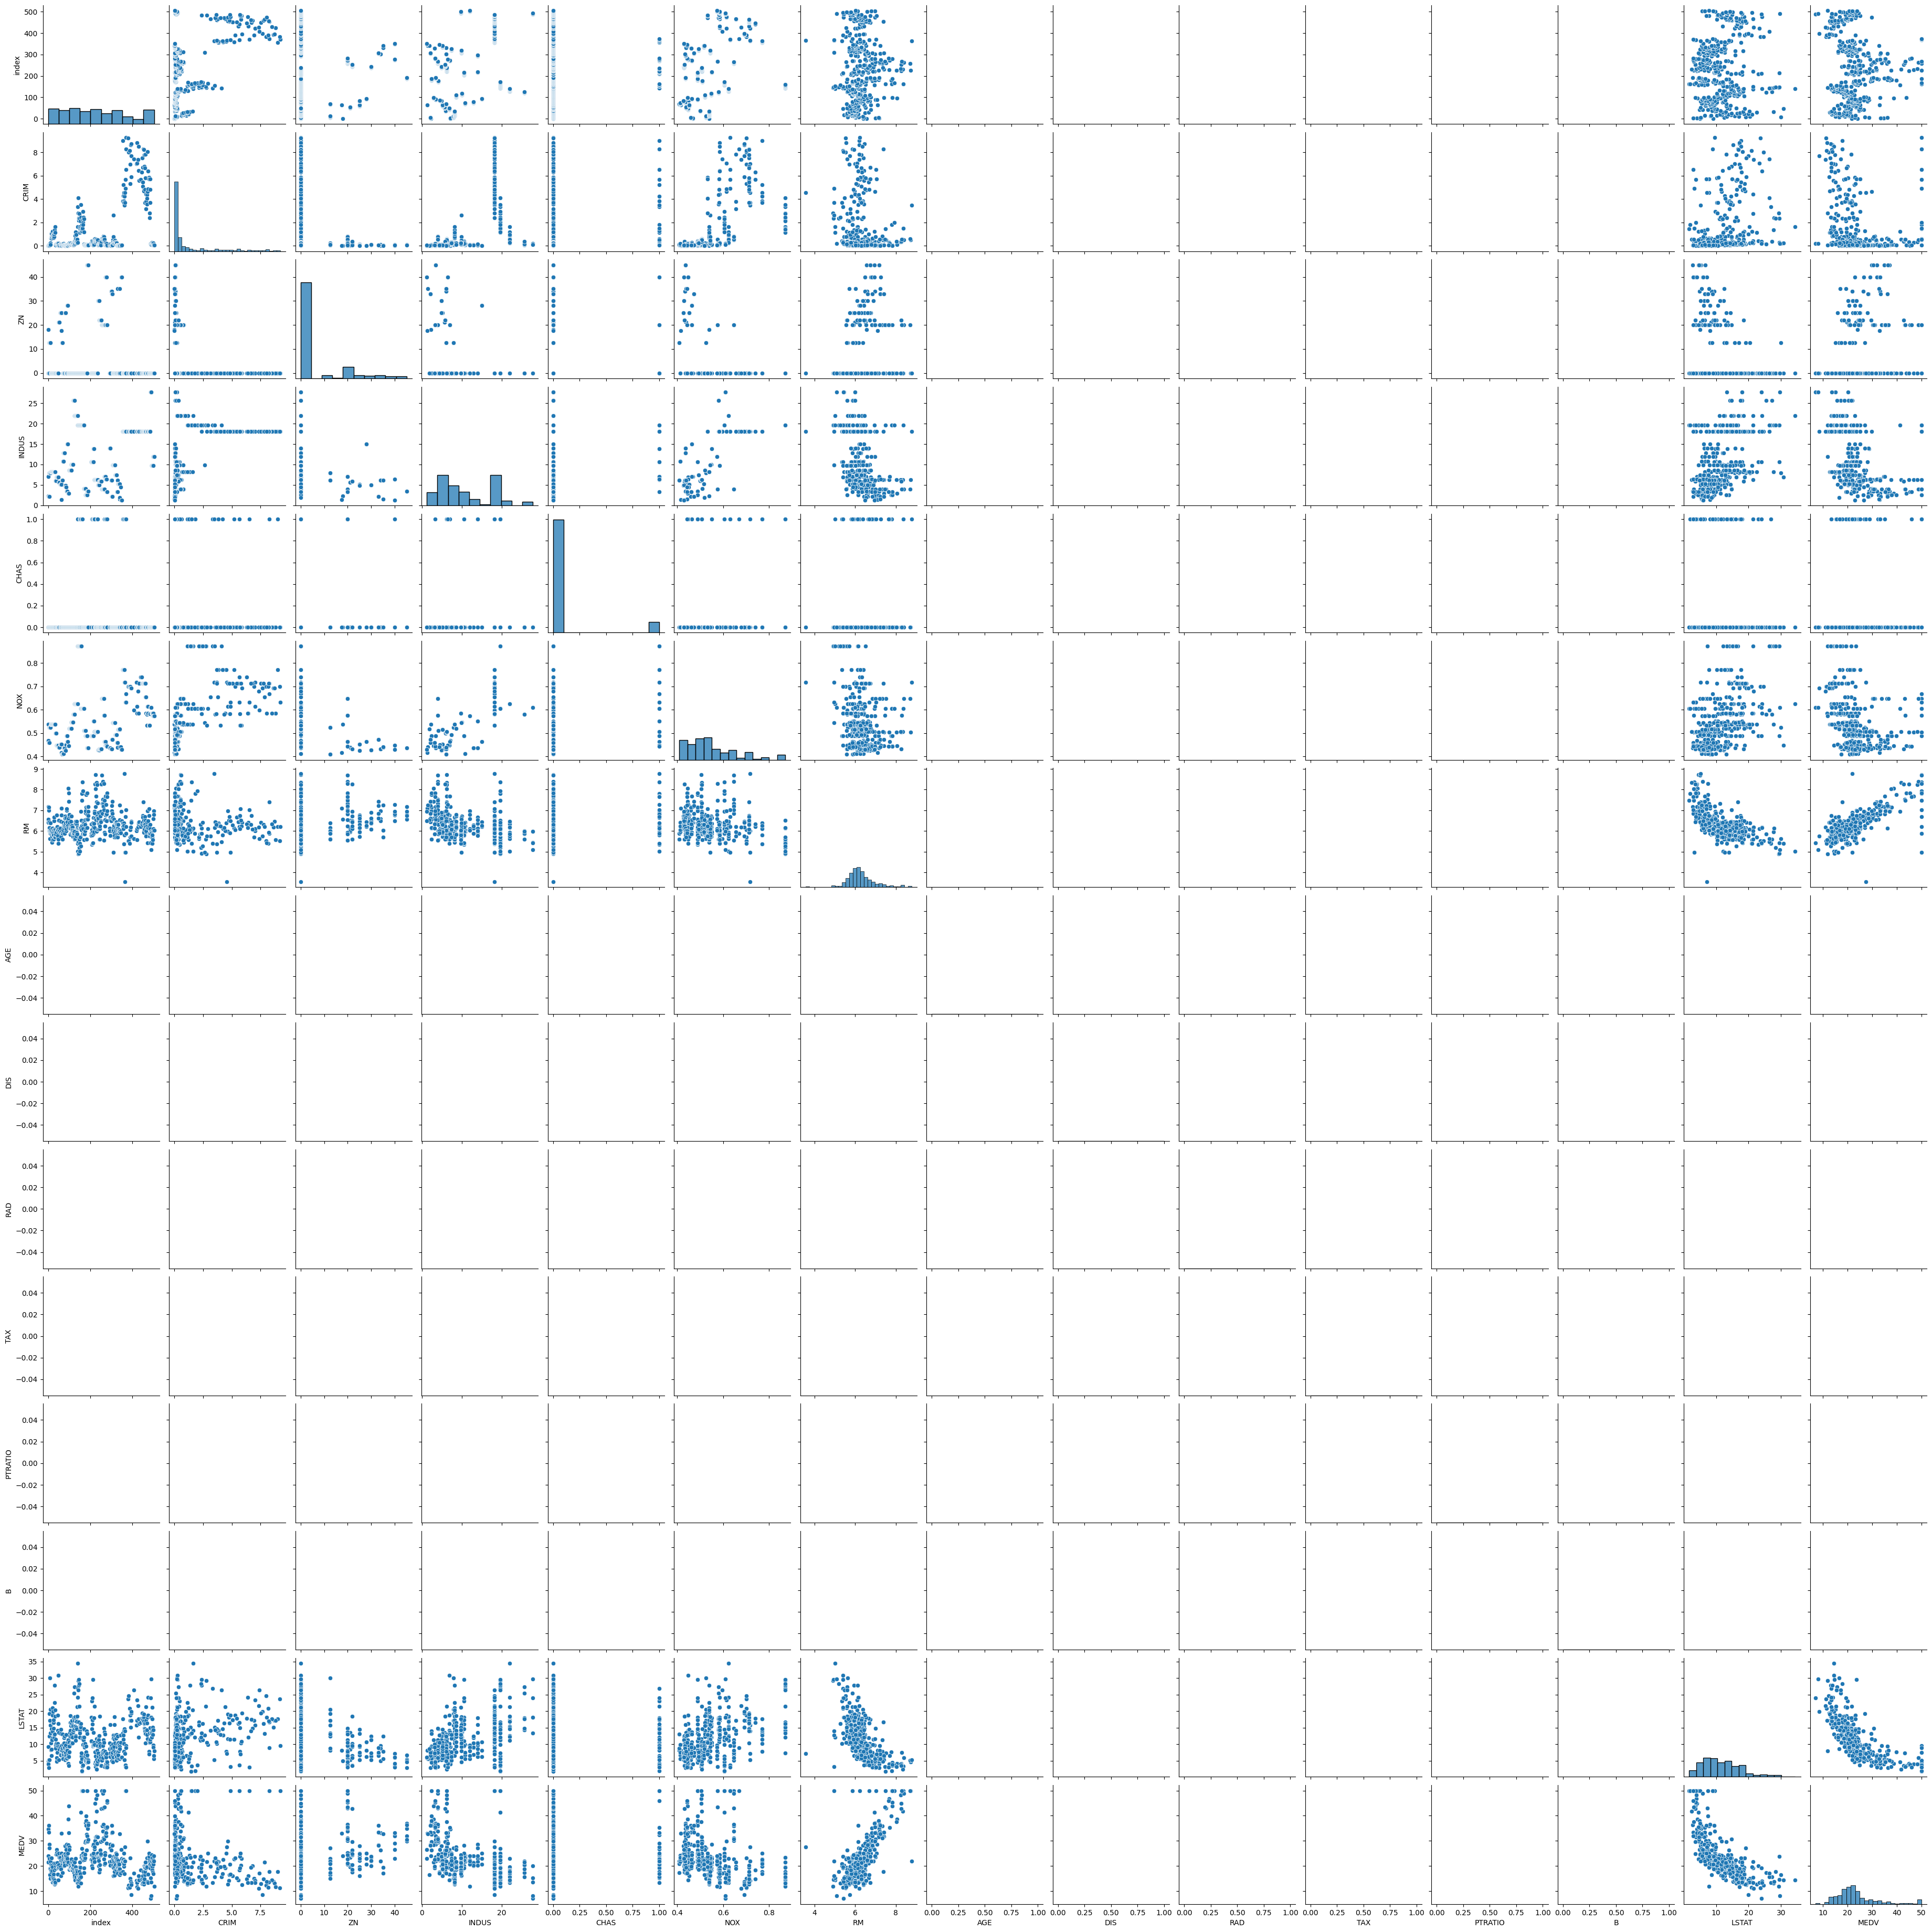

In [41]:
sns.pairplot(data)
plt.show()

In [42]:
status=pd.get_dummies(data['AGE'])

In [43]:
status.head()

""
0
1
2
3
4


In [44]:
status=pd.get_dummies(data['AGE'],drop_first=True)

In [45]:
data=pd.concat([data,status],axis=1)

In [46]:
data.head()

,index,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0,0.538,6.575,NaN,NaN,NaN,NaN,NaN,NaN,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,NaN,NaN,NaN,NaN,NaN,NaN,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,NaN,NaN,NaN,NaN,NaN,NaN,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,NaN,NaN,NaN,NaN,NaN,NaN,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,NaN,NaN,NaN,NaN,NaN,NaN,5.33,36.2


In [47]:
data.drop(['AGE'],axis=1,inplace=True)

In [48]:
data.head()

,index,CRIM,ZN,INDUS,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0,0.538,6.575,NaN,NaN,NaN,NaN,NaN,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,NaN,NaN,NaN,NaN,NaN,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,NaN,NaN,NaN,NaN,NaN,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,NaN,NaN,NaN,NaN,NaN,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,NaN,NaN,NaN,NaN,NaN,5.33,36.2


In [52]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train,df_test=train_test_split(data,train_size=0.7,test_size=0.3,random_state=100)

In [53]:
df_train.describe()

,index,CRIM,ZN,INDUS,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,0.0,0.0,0.0,0.0,0.0,277.000000,277.000000
mean,229.649819,1.348232,5.967509,10.869747,0.086643,0.550320,6.266978,NaN,NaN,NaN,NaN,NaN,11.852708,22.912635
std,145.777563,2.301345,11.866972,6.547317,0.281820,0.110814,0.604144,NaN,NaN,NaN,NaN,NaN,5.816132,7.948796
min,0.000000,0.006320,0.000000,1.250000,0.000000,0.409000,3.561000,NaN,NaN,NaN,NaN,NaN,1.730000,8.100000
25%,108.000000,0.092520,0.000000,5.860000,0.000000,0.464000,5.920000,NaN,NaN,NaN,NaN,NaN,7.370000,18.300000
50%,218.000000,0.210380,0.000000,8.560000,0.000000,0.524000,6.169000,NaN,NaN,NaN,NaN,NaN,10.870000,21.400000
75%,333.000000,1.192940,0.000000,18.100000,0.000000,0.605000,6.567000,NaN,NaN,NaN,NaN,NaN,15.710000,25.000000
max,505.000000,9.232300,45.000000,27.740000,1.000000,0.871000,8.375000,NaN,NaN,NaN,NaN,NaN,29.930000,50.000000


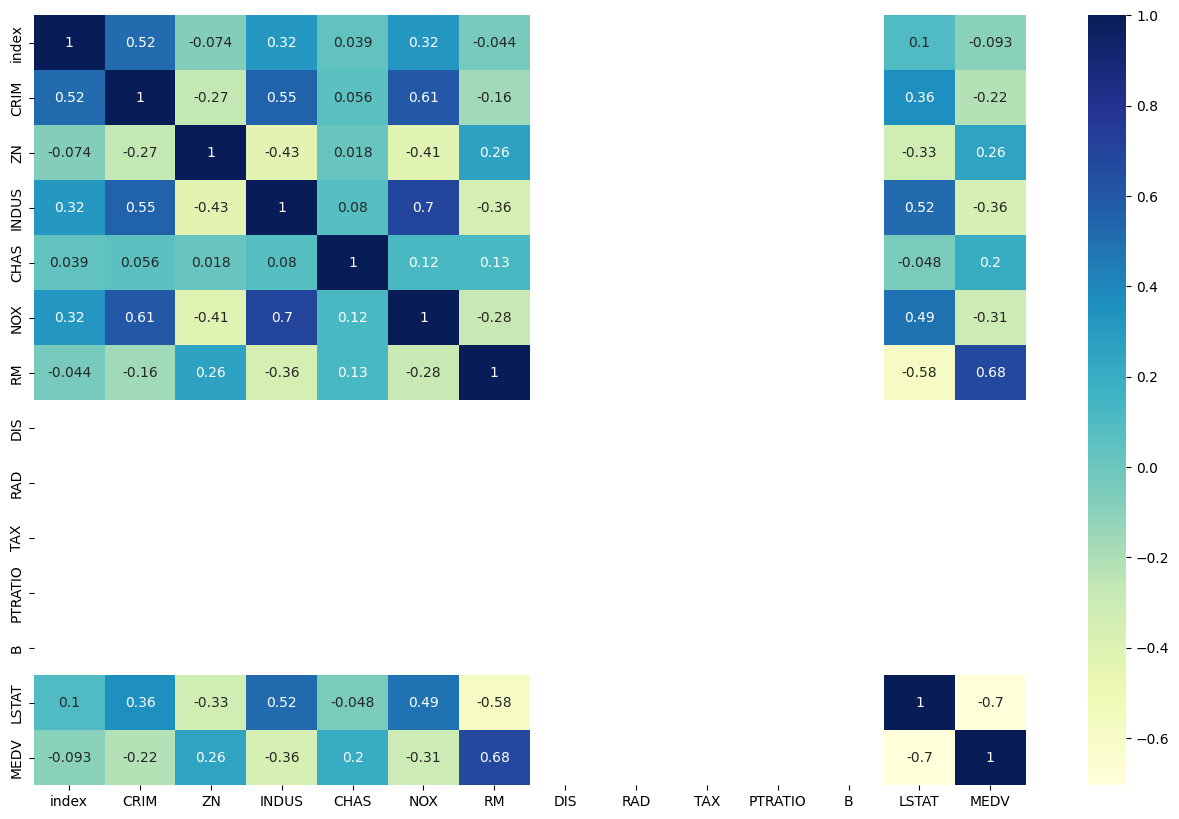

In [54]:
plt.figure(figsize=(16,10))
sns.heatmap(df_train.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [55]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [56]:
features=['ZN','INDUS','CHAS']

In [57]:
x=data[features]

In [58]:
y=data["CRIM"]

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5)

In [60]:
model=LinearRegression()

In [61]:
model.fit(x_train,y_train)

LinearRegression()

In [62]:
y_pred=model.predict(x_test)

In [63]:
mse=mean_squared_error(y_test,y_pred)

In [64]:
r2=r2_score(y_test,y_pred)

In [65]:
print(f'Mean Squared Error:{mse}')
print(f'R-squared:{r2}')

Mean Squared Error:3.788985497781712
R-squared:0.3239746687929337


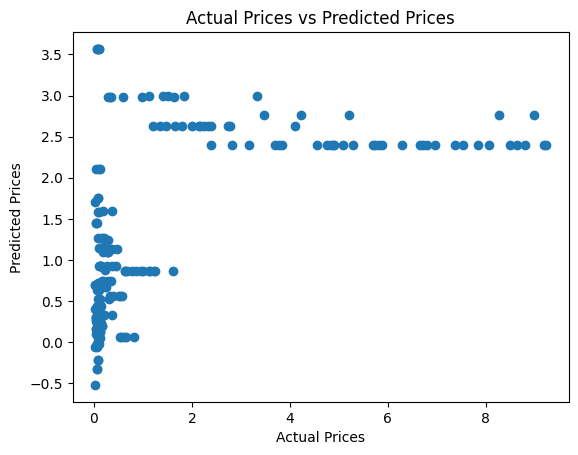

In [66]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [67]:
new_data=pd.DataFrame({'ZN':[2000],'INDUS':[3],'CHAS':[2]})
predicted_price=model.predict(new_data)
print(f'Predicted Price:{predicted_price[0]}')

Predicted Price:-14.943723344421672
